<a href="https://colab.research.google.com/github/suyashphatak23/Nutrition-calculation-of-food-items-in-the-Indian-Thali/blob/main/Nutritional_Value_Estimation_of_Popular_Indian_Thali_Items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install 'h5py==2.10.0' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
tensor

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Paths

DATASET_DIR = "/content/drive/MyDrive/Colab/Thali/dataset"
train = "/content/drive/MyDrive/Colab/Thali/dataset/train"
val = "/content/drive/MyDrive/Colab/Thali/dataset/val"
annotations = "/content/drive/MyDrive/Colab/Thali/dataset/train/ann.json"
annotations_val = "/content/drive/MyDrive/Colab/Thali/dataset/val/ann.json"

In [ ]:
!pip install tensorflow==1.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras==2.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
import tensorflow as tf
from IPython.display import Image,display
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from PIL import Image
from matplotlib import cm
import skimage
import os
import sys
import random
import math
import numpy as np
import matplotlib
import json
import cv2
import time
import fnmatch
import shutil
import numpy as np
import keras
import warnings
import shutil
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [ ]:
!git clone https://github.com/SayanSahu99/my-Mobile-Mask-RCNN.git

fatal: destination path 'my-Mobile-Mask-RCNN' already exists and is not an empty directory.


In [ ]:
!gdown --id 1ZYPQnES3uXXf5Zfr7BjzmzzMLxwHgoYw

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZYPQnES3uXXf5Zfr7BjzmzzMLxwHgoYw
To: /content/mobilenetv1_mask_rcnn_training_0337.h5
100% 97.3M/97.3M [00:00<00:00, 279MB/s]


In [ ]:
cd my-Mobile-Mask-RCNN

/content/my-Mobile-Mask-RCNN


In [ ]:
# Root directory of the project
ROOT_DIR =  os.getcwd()  #os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib,utils,visualize
from mrcnn.model import log

# Import COCO config
# sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
# import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = "/content/drive/MyDrive/Colab/Thali/model"
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

In [ ]:
cd ..

/content


In [ ]:

############################################################
#  Configurations
############################################################


class CustomConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 3  # Background + toy

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 50

    VALIDATION_STEPS = 50

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

config = CustomConfig()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_HEAD                 original
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_HEAD    

In [ ]:

############################################################
#  Dataset
############################################################

class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, subset):
        """Load a subset of the bottle dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("object", 1, "chapati")
        self.add_class("object", 2, "rice")
        self.add_class("object", 3, "dal")

        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        # VGG Image Annotator saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region
        annotations1 = json.load(open(os.path.join(dataset_dir, "ann.json")))
        # print(annotations1)
        annotations = list(annotations1.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]
        
        # Add images
        for a in annotations:
            # print(a)
            # Get the x, y coordinates of points of the polygons that make up
            # the outline of each object instance. There are stores in the
            # shape_attributes (see json format above)
            polygons = [r['shape_attributes'] for r in a['regions']] 
            objects = [s['region_attributes']['name'] for s in a['regions']]
            print("objects:",objects)

            name_dict = {"chapati": 1, "rice": 2, "dal": 3}

            # key = tuple(name_dict)
            num_ids = [name_dict[a] for a in objects]
     
            # num_ids = [int(n['Event']) for n in objects]
            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            print("numids",num_ids)
            image_path = os.path.join(dataset_dir, a['filename'])
            if(os.path.exists(image_path)):
              image = skimage.io.imread(image_path)
            else: 
              continue
            height, width = image.shape[:2]

            self.add_image(
                "object",  ## for a single class just add the name here
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                num_ids=num_ids)

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a bottle dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        if info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)
        num_ids = info['num_ids']
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
          # Get indexes of pixels inside the polygon and set them to 1
          rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
          mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        # Map class names to class IDs.
        num_ids = np.array(num_ids, dtype=np.int32)
        return mask, num_ids

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "object":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [ ]:
# Training dataset.
dataset_train = CustomDataset()
dataset_train.load_custom(DATASET_DIR, "train")
dataset_train.prepare()

objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 2, 3]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'rice', 'dal', 'rice']
numids [1, 2, 3, 2]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 1, 2, 3]
objects: ['chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 2, 3]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'chapati', 'chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 1, 1, 2, 3]
objects: ['chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 2, 3]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]


In [ ]:
# Validation dataset.
dataset_val = CustomDataset()
dataset_val.load_custom(DATASET_DIR, "val")
dataset_val.prepare()

objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 2, 3]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'rice', 'dal', 'rice']
numids [1, 2, 3, 2]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 1, 2, 3]
objects: ['chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 2, 3]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]
objects: ['chapati', 'chapati', 'chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 1, 1, 2, 3]
objects: ['chapati', 'chapati', 'rice', 'dal']
numids [1, 1, 2, 3]
objects: ['chapati', 'rice', 'dal']
numids [1, 2, 3]


In [ ]:
#dataset = dataset_train
#class_names = dataset.class_names
#image_ids = np.random.choice(dataset.image_ids, 1)
#for image_id in image_ids:
 #   image = dataset.load_image(image_id)
 #   mask, class_ids = dataset.load_mask(image_id)
  #  visualize.display_top_masks(image, mask, class_ids, class_names)

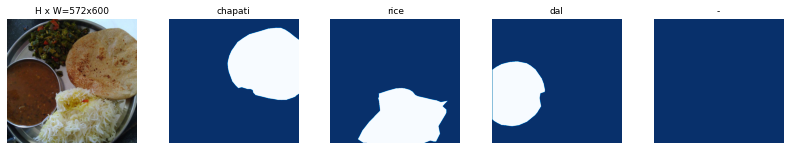

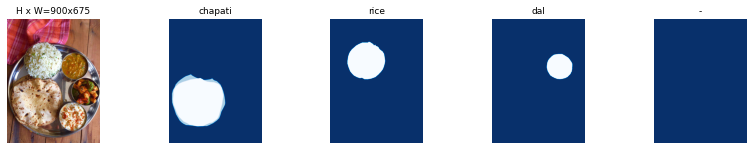

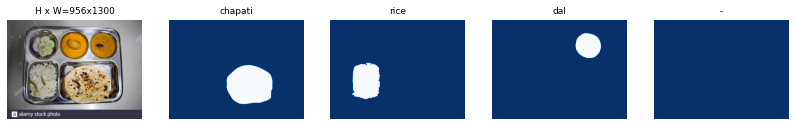

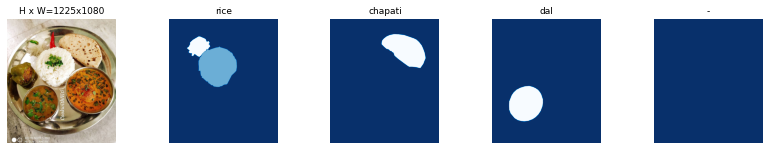

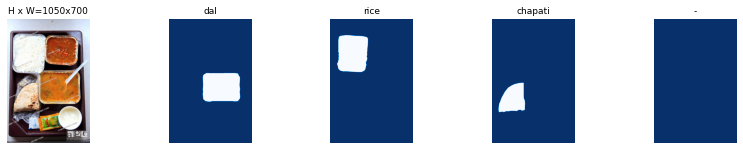

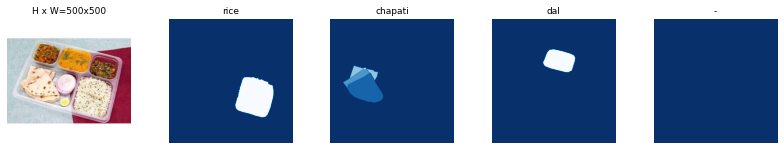

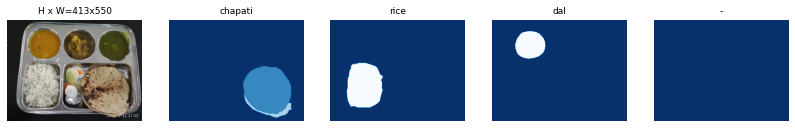

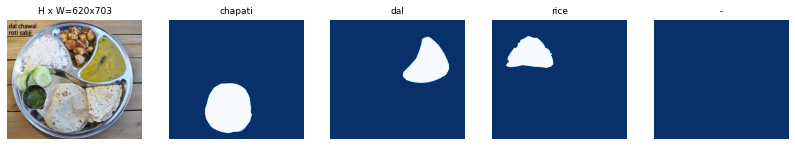

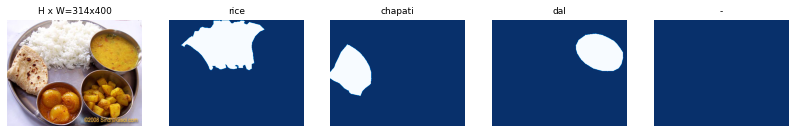

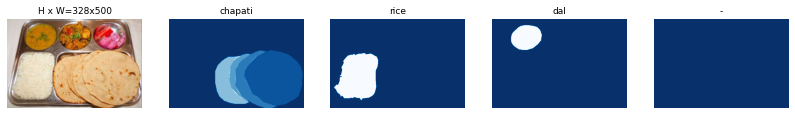

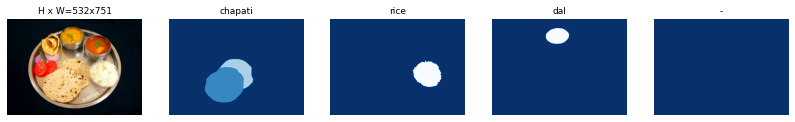

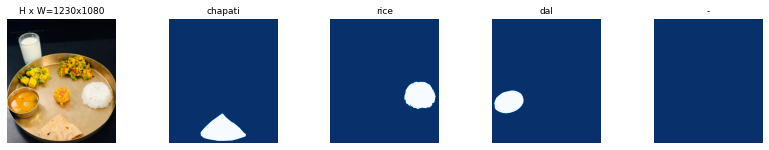

In [ ]:
dataset = dataset_train
class_names = dataset.class_names
#image_ids = np.random.choice(dataset.image_ids, 1)
for image_id in dataset.image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, class_names)

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [ ]:

# Which weights to start with?
init_with = "last"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask", "mrcnn_bbox_loss"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights("/content/drive/MyDrive/Colab/Thali/model/object20221005T1703/mask_rcnn_object_0003.h5", by_name=True)

Re-starting from epoch 3


In [ ]:
print("Training network heads")
history=model.train(dataset_train,
            dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=20,
            layers='heads')

Training network heads

Starting at epoch 3. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Colab/Thali/model/object20221005T1703/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_con

In [ ]:
# print("Training network heads")
# history=model.train(dataset_train,
#             dataset_val,
#             learning_rate=config.LEARNING_RATE,
#             epochs=34,
#             layers='all')

In [ ]:

class InferenceConfig(CustomConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_HEAD                 original
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_HEAD    

In [ ]:
# Create model in inference mode
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=MODEL_DIR)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
model_path = "/content/drive/MyDrive/Colab/Thali/model/object20221005T1703/mask_rcnn_object_0020.h5"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/MyDrive/Colab/Thali/model/object20221005T1703/mask_rcnn_object_0020.h5


Re-starting from epoch 20


Processing 1 images
image                    shape: (1050, 700, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1050.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


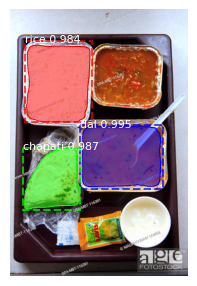

Processing 1 images
image                    shape: (500, 500, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


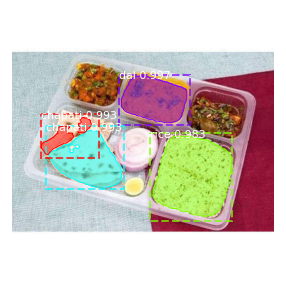

Processing 1 images
image                    shape: (620, 703, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


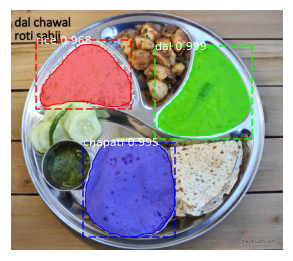

Processing 1 images
image                    shape: (314, 400, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


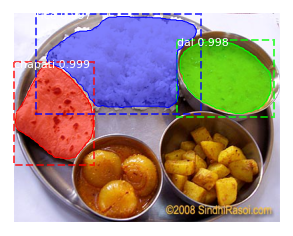

Processing 1 images
image                    shape: (532, 751, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


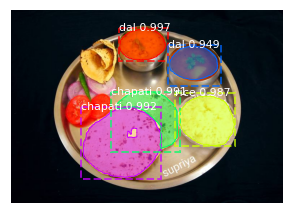

Processing 1 images
image                    shape: (1230, 1080, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1230.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


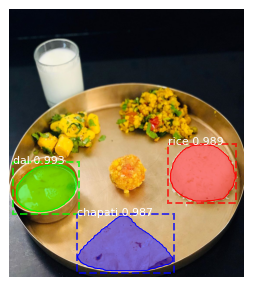

In [ ]:
real_test_dir = "/content/drive/MyDrive/Colab/Thali/dataset/train/final images"
image_paths = []
for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))
class_names = dataset_train.class_names
count = 0
for image_path in image_paths:
    if (count == 6): break
    img = load_img(image_path)
    img_arr = np.array(img)
    results = model.detect([img_arr], verbose=1)
    r = results[0]
    count += 1
    visualize.display_instances(img_arr, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'], figsize=(5,5))

In [ ]:
carb_per_unit={'chapati':39.25,'rice':28.7,'dal':10.18} #Per 100g
pro_per_unit={'chapati':6.5,'rice':2.36,'dal':4.68} #Per 100g
fat_per_unit={'chapati':9.25,'rice':0.19,'dal':3.24} #Per 100g
def get_carb(class_name,real_food_area):
  return carb_per_unit[class_name]
def get_pro(class_name,real_food_area):
  return pro_per_unit[class_name]
def get_fat(class_name,real_food_area):
  return fat_per_unit[class_name]

In [ ]:
# masked_coin_pixels=1130972
# real_coin_size=12
# real_coin_area=113.04
# pixels_per_inch_sq=masked_coin_pixels/real_coin_area
carb=[]
pro=[]
fat=[]
items=[]
for i in range(r['masks'].shape[-1]):
  #$ print()
  masked_food_pixels=r['masks'][:,:,i].sum()
  class_name=dataset_val.class_names[r['class_ids'][i]]
  # real_food_area=masked_food_pixels/pixels_per_inch_sq
  carbo=get_carb(class_name,masked_food_pixels)
  protein=get_pro(class_name,masked_food_pixels)
  fats=get_fat(class_name,masked_food_pixels)
  carb.append(carbo)
  pro.append(protein)
  fat.append(fats)
  items.append(class_name)
  print("{3} has the nutrients: {0}g carbohydrates, {1}g protein and {2}g of fat".format(int(carbo),int(protein),int(fats),class_name))

dal has the nutrients: 10g carbohydrates, 4g protein and 3g of fat
rice has the nutrients: 28g carbohydrates, 2g protein and 0g of fat
chapati has the nutrients: 39g carbohydrates, 6g protein and 9g of fat


In [ ]:
print("Total carbohydrates: ",sum(carb))

Total carbohydrates:  78.13


In [ ]:
print("Total proteins: ",sum(pro))

Total proteins:  13.54


In [ ]:
print("Total fats:",sum(fat))

Total fats: 12.68


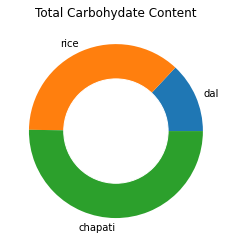

In [ ]:
import matplotlib.pyplot as plt
 
# Create a pieplot
plt.pie(carb,labels=items)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Carbohydate Content")
plt.show()



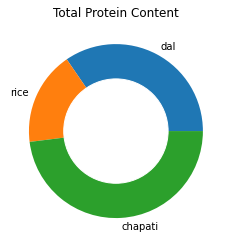

In [ ]:
import matplotlib.pyplot as plt
 
# Create a pieplot
plt.pie(pro,labels=items)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Protein Content") 
plt.show()



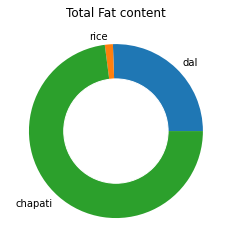

In [ ]:
import matplotlib.pyplot as plt
 
# Create a pieplot
plt.pie(fat,labels=items)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Fat content")
plt.show()



In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_train, config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
print("mAP: ", np.mean(APs))

mAP:  0.946666669845581


In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_train, config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=0.5)
    APs.append(AP)
print("mAP: ", np.mean(APs))

mAP:  0.9166666686534881


In [ ]:
# Compute VOC-Style mAP @ IoU=0.75
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_train, config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=0.75)
    APs.append(AP)
print("mAP: ", np.mean(APs))

mAP:  0.8583333333333332


In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_val.image_ids, 10)
recall = []
precision = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_train, config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    _, precisions, recalls, _ =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=0.5)
    recall.append(np.mean(recalls))
    precision.append(np.mean(precisions))
print("F1: ", (2* (np.mean(precisions) * np.mean(recalls)))/(np.mean(precisions) + np.mean(recalls)))
print("recall: ", np.mean(recall))
print("Precision: ", np.mean(precision))

F1:  0.6857142896068339
recall:  0.5769047657790638
Precision:  0.8157142857142856
